<a href="https://colab.research.google.com/github/JorozcoBe/AB-testing/blob/master/treasure_island.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/treasure_island.csv")

In [ ]:
df.userid

4225009    9
3003362    9
4231498    9
4120964    9
4092310    9
          ..
4016143    1
4117886    1
4192423    1
4110643    1
3118494    1
Name: userid, Length: 31796, dtype: int64

In [ ]:
pre_data_control = df[(df.receivedMailing == 0) & (df.weeknum < 201903)]

In [ ]:
df[(df.userid)&(df.receivedMailing == 1) ]


,userid,weeknum,educationclass,weekssinceregistration,regularityactivity,logindays,playtime,receivedMailing
1,176325,201902,7,332,inconsistently active,3,5772000,True
2,176609,201902,8,332,consistently active,6,5395000,True
10,202675,201902,7,320,consistently active,3,2752000,True
13,211321,201902,2,312,inconsistently active,1,564000,True
14,211329,201902,7,312,inconsistently inactive,0,0,True
...,...,...,...,...,...,...,...,...
282194,4508561,201910,2,9,inconsistently inactive,0,0,True
282198,4508677,201910,4,9,inconsistently active,3,3050000,True
282200,4508725,201910,2,9,consistently active,5,5973000,True
282203,4508793,201910,7,9,inconsistently active,4,4659000,True


In [ ]:
df.head()

,userid,weeknum,educationclass,weekssinceregistration,regularityactivity,logindays,playtime,receivedMailing
0,174008,201902,7,333,consistently inactive,0,0,True
1,176325,201902,7,332,inconsistently active,3,5772000,True
2,176609,201902,8,332,consistently active,6,5395000,True
3,182218,201902,8,331,consistently inactive,0,0,True
4,182226,201902,6,331,consistently active,2,1401000,True


In [ ]:
df.astype

<bound method NDFrame.astype of          userid  weeknum  educationclass  ...  logindays playtime  receivedMailing
0        174008   201902               7  ...          0        0             True
1        176325   201902               7  ...          3  5772000             True
2        176609   201902               8  ...          6  5395000             True
3        182218   201902               8  ...          0        0             True
4        182226   201902               6  ...          2  1401000             True
...         ...      ...             ...  ...        ...      ...              ...
282206  4508822   201910               3  ...          0        0            False
282207  4508832   201910               8  ...          0        0             True
282208  4508846   201910               4  ...          1        0             True
282209  4508867   201910               5  ...          3   372000            False
282210  4508891   201910               3  ...          

In [ ]:
#df.dtype
df.dtypes

userid                     int64
weeknum                    int64
educationclass             int64
weekssinceregistration     int64
regularityactivity        object
logindays                  int64
playtime                   int64
receivedMailing             bool
dtype: object

In [ ]:
df.isnull().sum()

userid                    0
weeknum                   0
educationclass            0
weekssinceregistration    0
regularityactivity        0
logindays                 0
playtime                  0
receivedMailing           0
dtype: int64

In [ ]:
df.shape

(282211, 8)

In [ ]:
df.weeknum.value_counts()

201902    31697
201903    31652
201904    31555
201905    31435
201906    31354
201907    31259
201908    31141
201909    31087
201910    31031
Name: weeknum, dtype: int64

In [ ]:
df["receivedMailing"] = df["receivedMailing"].map({True:1, False:0})

In [ ]:
df.receivedMailing.value_counts()

1    188122
0     94089
Name: receivedMailing, dtype: int64

Creating the subsets (pre/post control/exp and first week control and exp) 


In [ ]:
pre_data_control = df[(df.receivedMailing == 0) & (df.weeknum < 201903)]

In [ ]:
pre_data_control_1= pre_data_control.values

In [ ]:
#xxx= np.shape(pre_data_control_1)[0]
#mylist=[pre_data_control, ]
#xx = []
#for i in mylist:
#  xx.append(np.shape(i)[0])

In [ ]:
post_data_control = df[(df.receivedMailing == 0) & (df.weeknum >= 201903)]

In [ ]:
post_data_control_1 =post_data_control.values

In [ ]:
pre_data_exp = df[(df.receivedMailing == 1) & (df.weeknum < 201903)]

In [ ]:
pre_data_exp_1 = pre_data_exp.values

In [ ]:
post_data_exp = df[(df.receivedMailing == 1) & (df.weeknum >= 201903)]

In [ ]:
post_data_exp_1= post_data_exp.values

In [ ]:
first_week_control = df[(df.receivedMailing == 0) & (df.weeknum == 201903)]

In [ ]:
first_week_control_1 = first_week_control.values

In [ ]:
first_week_exp = df[(df.receivedMailing == 1) & (df.weeknum == 201903)]

In [ ]:
first_week_exp_1 = first_week_exp.values

Calculating the n for the analysis 

In [ ]:
#xxx= np.shape(pre_data_control_1)[0]
mylist=[pre_data_control_1, post_data_control_1, pre_data_exp_1, post_data_exp_1, first_week_control_1, first_week_exp_1]
xx = []
for i in mylist:
  xx.append(np.shape(i)[0])
  

In [ ]:
#xxx= np.shape(pre_data_control_1)[0]

In [ ]:
mylist

In [ ]:
xx

[10560, 83529, 21137, 166985, 10550, 21102]

In [ ]:
#keys = ['a', 'b', 'c']
#values = [1, 2, 3]

#print(dictionary) # {'a': 1, 'b': 2, 'c': 3}


keys = ["pre_data_control_2", "post_data_control_2", "pre_data_exp_2", "post_data_exp_2", "first_week_control_2", "first_week_exp_2"]
dictionary = dict(zip(keys, xx))
print(dictionary)

{'pre_data_control_2': 10560, 'post_data_control_2': 83529, 'pre_data_exp_2': 21137, 'post_data_exp_2': 166985, 'first_week_control_2': 10550, 'first_week_exp_2': 21102}


In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
x = thisdict["model"]

In [ ]:
x

'Mustang'

Calculate inactive users/ counting 


In [ ]:
#xxx= np.shape(pre_data_control_1)[0]

In [ ]:
pre_inactive_control = 0
#print(pre_data_control_1[3,4])
for i in pre_data_control_1[:,4]:
  if i == "consistently inactive":
    pre_inactive_control = pre_inactive_control + 1

print(pre_inactive_control)


1252


In [ ]:
#post_data_control = 0
#print(pre_data_control_1[3,4])
#for i in post_data_control_1[:,4]:
#  if i == "consistently inactive":
#    counter_post_data_control = counter_post_data_control + 1

#print(counter_post_data_control)

In [ ]:
pre_inactive_exp = 0
#print(pre_data_control_1[3,4])
for i in pre_data_exp_1[:,4]:
  if i == "consistently inactive":
    pre_inactive_exp = pre_inactive_exp + 1

print(pre_inactive_exp)

2492


In [ ]:
#counter_post_data_exp = 0
#print(pre_data_control_1[3,4])
#for i in post_data_exp_1[:,4]:
#  if i == "consistently inactive":
#    counter_post_data_exp = counter_post_data_exp + 1

#print(counter_post_data_exp)

In [ ]:
first_inactive_control = 0
#print(pre_data_control_1[3,4])
for i in first_week_control_1[:,4]:
  if i == "consistently inactive":
    first_inactive_control = first_inactive_control + 1

print(first_inactive_control)

1212


In [ ]:
first_inactive_exp = 0
#print(pre_data_control_1[3,4])
for i in first_week_exp_1[:,4]:
  if i == "consistently inactive":
    first_inactive_exp = first_inactive_exp + 1

print(first_inactive_exp)


###this is 80% of the pre-processing, I'm thinking that it may be needed to also create another dictionary
###but I can also not need it, i may need to create matrices so i can put them into my prop Z test

2048


In [ ]:
#import numpy as np
#from statsmodels.stats.proportion import proportions_ztest
#count = np.array([5, 12])
#nobs = np.array([83, 99])
#stat, pval = proportions_ztest(count, nobs)
#print('{0:0.3f}'.format(pval))
#0.159
#print(stat)

-1.4078304151258787


Generating matrices for analysis


In [ ]:
#df.value_counts()

In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

##this is for first_week_matrix 

count = np.array([1212, 2048])
nobs = np.array([9338, 19054])
stat, pval = proportions_ztest(count, nobs)
#print('{0:0.3f}'.format(pval))
#0.159
print(pval)

3.0354209146430396e-08


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

##this is for control matrix

count = np.array([1252, 1212])
nobs = np.array([9308, 9338])
stat, pval = proportions_ztest(count, nobs)
#print('{0:0.3f}'.format(pval))
#0.159
print(pval)

0.34174056904123407


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

##this is for exp matrix

count = np.array([2492, 2048])
nobs = np.array([18645, 19054])
stat, pval = proportions_ztest(count, nobs)
#print('{0:0.3f}'.format(pval))
#0.159
print(pval)

5.899215653367747e-15


In [ ]:
# Creating dataframe with
# some missing values
#NaN = np.nan
#dataframe = pd.DataFrame({'Name': ['Shobhit', 'Vaibhav',
#								'Vimal', 'Sourabh',
#								'Rahul', 'Shobhit'],
#						'Physics': [11, 12, 13, 14, NaN, 11],
#						'Chemistry': [10, 14, NaN, 18, 20, 10],
#						'Math': [13, 10, 15, NaN, NaN, 13]})

#display(dataframe)


In [ ]:
# count of student with greater
# than 11 marks in physics
#print("Count of students with physics marks greater than 11 is->",
#data_count_ie = dataframe[dataframe['Physics'] > 11]['Name'].count()

# resultant of above dataframe
#dataframe_ie = dataframe[dataframe['Physics']>11]


In [ ]:
#pre_control_n = pre_data_control.count()
#pre_control_n
#pre_control_n = df[(df.receivedMailing == 0) & (df.weeknum < 201903)].count()
#print(pre_control_n)


Question 2
####--- SECOND QUESTION ---#####

### First, we select the week post intervention and group the number of inactive users per week in order to plot
### the percentages and analyze the sustain effect

In [ ]:
#post_data_exp_1

In [ ]:
#pre_data_control = df[(df.receivedMailing == 0) & (df.weeknum < 201903)]

In [ ]:
#df = pd.DataFrame({"column1": ["a", "b", "a"]})
#print(df)

In [ ]:
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#print(df)

In [ ]:
#df[column_name].replace([old_value1, old_value2, old_value3],[new_value1, new_value2, new_value3])
#df['name']= df['name'].replace(['michael','louis'],['karl','lionel'])

post_data_exp['weeknum']=post_data_exp['weeknum'].replace([201903, 201904,201905,201906,201907,201908,201909, 201910], [1,2,3,4,5,6,7,8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
weekly_data = post_data_exp.copy()
#post_data_exp.tail()

In [ ]:
#ata[‘construction_year’]=data[‘construction_year’].replace(to_replace=0,value=2010)
#post_data_control["weeknum"] = post_data_control['weeknum'].replace()
weekly_data.head()

,userid,weeknum,educationclass,weekssinceregistration,regularityactivity,logindays,playtime,receivedMailing
31697,174008,1,5,334,inconsistently active,2,1715000,1
31698,176325,1,7,333,inconsistently active,3,1226000,1
31699,176609,1,8,333,consistently active,4,1796000,1
31700,182218,1,8,332,consistently inactive,0,0,1
31701,182226,1,6,332,consistently active,3,973000,1


In [ ]:
weekly_data.drop(["userid", "educationclass", "weekssinceregistration", "logindays", "playtime", "receivedMailing"], axis = 1, inplace= True)

In [ ]:
weekly_data

,weeknum,regularityactivity
31697,1,inconsistently active
31698,1,inconsistently active
31699,1,consistently active
31700,1,consistently inactive
31701,1,consistently active
...,...,...
282204,8,inconsistently active
282205,8,inconsistently inactive
282207,8,consistently inactive
282208,8,inconsistently active


In [ ]:
evolution_day_a= weekly_data[(weekly_data.regularityactivity == "consistently inactive")]
evolution_day_a

,weeknum,regularityactivity
31700,1,consistently inactive
31702,1,consistently inactive
31762,1,consistently inactive
31770,1,consistently inactive
31771,1,consistently inactive
...,...,...
282187,8,consistently inactive
282188,8,consistently inactive
282192,8,consistently inactive
282193,8,consistently inactive


In [ ]:
evolution_day_a.drop(["regularityactivity"], axis= 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
evolution_day_a.set_axis([0,1,2,3,4,5,6,7], axis="index")

ValueError: ignored

In [ ]:
#df_1 = pd.DataFrame([[1.1, 1.1, 1.1, 2.6, 2.5, 3.4,2.6,2.6,3.4,3.4,2.6,1.1,1.1,3.3], list('AAABBBBABCBDDD'), [1.1, 1.7, 2.5, 2.6, 3.3, 3.8,4.0,4.2,4.3,4.5,4.6,4.7,4.7,4.8], ['x/y/z','x/y','x/y/z/n','x/u','x','x/u/v','x/y/z','x','x/u/v/b','-','x/y','x/y/z','x','x/u/v/w'],['1','3','3','2','4','2','5','3','6','3','5','1','1','1']]).T
#df_1.columns = ['col1','col2','col3','col4','col5']
#df_1

In [ ]:
#df_1.groupby(['col5','col2']).reset_index()

In [ ]:
inactive = evolution_day_a.groupby(['weeknum']).size()
inactive

weeknum
1    2048
2    1880
3    1801
4    1826
5    1978
6    2744
7    3472
8    3800
dtype: int64

In [ ]:
inactive_count = pd.DataFrame(inactive)
inactive_count

#evolution_day_a.value_counts()

,0
weeknum,
1,2048
2,1880
3,1801
4,1826
5,1978
6,2744
7,3472
8,3800


In [ ]:
#n_evolution_day_a = evolution_day_a.value_counts().sort_index()

In [ ]:
#n_evolution_day_a

In [ ]:
#print(type(n_evolution_day_a))

<class 'pandas.core.series.Series'>


In [ ]:
#inactive = pd.DataFrame(evolution_day_a)
#inactive

In [ ]:
inactive_count = inactive_count.rename(columns = {0:'inactive'})

In [ ]:
inactive_count.head()

,inactive
weeknum,
1,2048
2,1880
3,1801
4,1826
5,1978


In [ ]:
n_evolution_day_b= weekly_data.weeknum.value_counts()
#weekly_data.weeknum.count
print(n_evolution_day_b)

1    21102
2    21027
3    20946
4    20901
5    20849
6    20764
7    20719
8    20677
Name: weeknum, dtype: int64


In [ ]:
total_per_week= pd.DataFrame(n_evolution_day_b)

In [ ]:
total_per_week = total_per_week.rename(columns = {"weeknum":'total_per_week'})

In [ ]:
total_per_week.head()

,total_per_week
1,21102
2,21027
3,20946
4,20901
5,20849


In [ ]:
#df_all = pd.concat([inactive, total_per_week], axis=1)

In [ ]:
evolution_table= pd.concat([inactive_count, total_per_week.set_index(inactive_count.index)], axis=1)
evolution_table

,inactive,total_per_week
weeknum,,
1,2048,21102
2,1880,21027
3,1801,20946
4,1826,20901
5,1978,20849
6,2744,20764
7,3472,20719
8,3800,20677


In [ ]:
#import pandas as pd
#data = {"col1":[100,200,300,400,500],"col2":[10,20,30,40,50]}
#df= pd.DataFrame(data)

evolution_table["percent"] = evolution_table["inactive"]/evolution_table["total_per_week"]
print(evolution_table)

         inactive  total_per_week   percent
weeknum                                    
1            2048           21102  0.097052
2            1880           21027  0.089409
3            1801           20946  0.085983
4            1826           20901  0.087364
5            1978           20849  0.094873
6            2744           20764  0.132152
7            3472           20719  0.167576
8            3800           20677  0.183779


In [ ]:
decimals = 2    
evolution_table['percent'] = evolution_table['percent'].apply(lambda x: round(x, decimals))

In [ ]:
week = [1,2,3,4,5,6,7,8]
#import pandas as pd
#list_name = ['item_1', 'item_2', 'item_3',...]

import pandas as pd
#list_name = ['item_1', 'item_2', 'item_3',...]
#df = pd.DataFrame (list_name, columns = ['column_name'])

weeknumber = pd.DataFrame (week, columns = ['weeknumber'])


In [ ]:
weeknumber

,weeknumber
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [ ]:
#evolution_table= pd.concat([inactive, total_per_week.set_index(inactive.index)], axis=1)
#evolution_table

In [ ]:
question_2 = pd.concat([evolution_table, weeknumber.set_index(inactive_count.index)], axis = 1)
question_2

,inactive,total_per_week,percent,weeknumber
weeknum,,,,
1,2048,21102,0.10,1
2,1880,21027,0.09,2
3,1801,20946,0.09,3
4,1826,20901,0.09,4
5,1978,20849,0.09,5
6,2744,20764,0.13,6
7,3472,20719,0.17,7
8,3800,20677,0.18,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


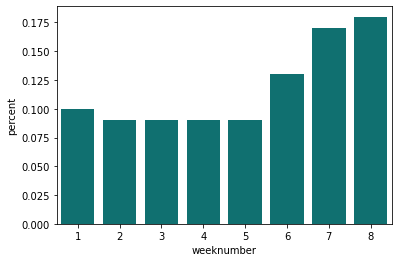

In [ ]:
sns.barplot('weeknumber', 'percent', data=question_2, color="teal")
plt.show()

In [ ]:
post_data_exp.groupby("logindays")["weeknum"].count()

logindays
0    77936
1    35978
2    22264
3    13899
4     8440
5     4867
6     2529
7     1072
Name: weeknum, dtype: int64

In [ ]:
post_data_exp.logindays.value_counts()

0    77936
1    35978
2    22264
3    13899
4     8440
5     4867
6     2529
7     1072
Name: logindays, dtype: int64

In [ ]:
evolution_days = post_data_exp.groupby("weeknum")["logindays"].mean()

In [ ]:
evolution_days

weeknum
1    1.828926
2    1.525134
3    1.349327
4    1.306110
5    1.131181
6    0.908833
7    0.701578
8    0.955651
Name: logindays, dtype: float64

In [ ]:
#weeknumber = pd.DataFrame (week, columns = ['weeknumber'])
#days_login_mean = pd.DataFrame (evolution_days, columns = ['days_login_mean'])
#days_login_mean

In [ ]:
#evolution_table= pd.concat([inactive_count, total_per_week.set_index(inactive_count.index)], axis=1)
#evolution_table

#frames = [question, df2]
  
#result = pd.concat(frames)
#display(result)


evolution_table_2= pd.concat([question_2, evolution_days], axis = 1)
evolution_table_2

#horizontal_concat = pd.concat([df3, df4], axis=1)

,inactive,total_per_week,percent,weeknumber,logindays
weeknum,,,,,
1,2048,21102,0.10,1,1.828926
2,1880,21027,0.09,2,1.525134
3,1801,20946,0.09,3,1.349327
4,1826,20901,0.09,4,1.306110
5,1978,20849,0.09,5,1.131181
6,2744,20764,0.13,6,0.908833
7,3472,20719,0.17,7,0.701578
8,3800,20677,0.18,8,0.955651


In [ ]:
decimals = 2    
#evolution_table_2['logindays'] = evolution_table_2['logindays'].apply(lambda x: round(x, decimals), axis = 1)
evolution_table_2['logindays'] = evolution_table_2['logindays'].apply(lambda x: round(x, decimals))

In [ ]:
evolution_table_2

,inactive,total_per_week,percent,weeknumber,logindays
weeknum,,,,,
1,2048,21102,0.10,1,1.83
2,1880,21027,0.09,2,1.53
3,1801,20946,0.09,3,1.35
4,1826,20901,0.09,4,1.31
5,1978,20849,0.09,5,1.13
6,2744,20764,0.13,6,0.91
7,3472,20719,0.17,7,0.70
8,3800,20677,0.18,8,0.96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


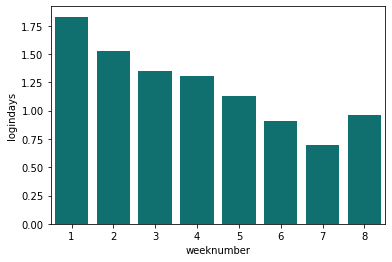

In [ ]:
sns.barplot('weeknumber', 'logindays', data=evolution_table_2, color="teal")
plt.show()

In [ ]:
pre_data_exp.

#post_data_exp.groupby("logindays")["weeknum"].count()

In [ ]:
post_data_exp.playtime.value_counts()

0           84333
300000         55
15000          42
775000         41
9000           40
            ...  
10411000        1
13811000        1
15021061        1
9236000         1
4005197         1
Name: playtime, Length: 13125, dtype: int64

In [ ]:
pre_data_exp.playtime.value_counts()

0           8738
300000         9
25000          9
683000         9
776000         9
            ... 
1739000        1
13208000       1
31308000       1
5058000        1
12225000       1
Name: playtime, Length: 6613, dtype: int64

In [ ]:
import datetime
#datetime.timedelta()

In [ ]:
#pre_data_exp['playtime'] = pre_data_exp.to_datetime(pre_data_exp['playtime'], unit='s')
#pd.to_datetime(pre_data_exp['playtime'], unit='s')

In [ ]:
#pre_data_exp['playtime'].astype('datetime64[s]')

In [ ]:
#millis=input()
#def convertor(x):
#    millis = int(millis)
#    seconds=(millis/1000)%60
#    seconds = int(seconds)
#    minutes=(millis/(1000*60))%60
#    minutes = int(minutes)
#    hours=(millis/(1000*60*60))%24

    return(convertor(300000))
print ("%d:%d:%d" % (hours, minutes, seconds))

0:5:0


In [ ]:
#print(convertor(300000))

In [ ]:
#def convertMillis(millis):
     #seconds=(millis/1000)%60
     minutes=(millis/(1000*60))%60
     #hours=(millis/(1000*60*60))%24
     return #seconds, minutes #hours
#print(convertMillis(300000))

(0.0, 5.0)


In [ ]:
def convertMillis(millis):
     #seconds=(millis/1000)%60
     minutes=(millis/(1000*60))%60
    
     return minutes
print(convertMillis(300000))

5.0


In [ ]:
pre_data_exp['minutes'] = pre_data_exp['playtime'].apply(convertMillis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pre_data_exp.head()

,userid,weeknum,educationclass,weekssinceregistration,regularityactivity,logindays,playtime,receivedMailing,minutes
0,174008,201902,7,333,consistently inactive,0,0,1,0.000000
1,176325,201902,7,332,inconsistently active,3,5772000,1,36.200000
2,176609,201902,8,332,consistently active,6,5395000,1,29.916667
3,182218,201902,8,331,consistently inactive,0,0,1,0.000000
4,182226,201902,6,331,consistently active,2,1401000,1,23.350000


In [ ]:
decimals = 0    
#evolution_table_2['logindays'] = evolution_table_2['logindays'].apply(lambda x: round(x, decimals), axis = 1)
pre_data_exp['minutes'] = pre_data_exp['minutes'].apply(lambda x: round(x, decimals))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pre_data_exp.head()

,userid,weeknum,educationclass,weekssinceregistration,regularityactivity,logindays,playtime,receivedMailing,minutes
0,174008,201902,7,333,consistently inactive,0,0,1,0.0
1,176325,201902,7,332,inconsistently active,3,5772000,1,36.0
2,176609,201902,8,332,consistently active,6,5395000,1,30.0
3,182218,201902,8,331,consistently inactive,0,0,1,0.0
4,182226,201902,6,331,consistently active,2,1401000,1,23.0


In [ ]:
post_data_exp['minutes'] = post_data_exp['playtime'].apply(convertMillis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
decimals = 0    
#evolution_table_2['logindays'] = evolution_table_2['logindays'].apply(lambda x: round(x, decimals), axis = 1)
post_data_exp['minutes'] = post_data_exp['minutes'].apply(lambda x: round(x, decimals))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
post_data_exp.dtypes

userid                      int64
weeknum                     int64
educationclass              int64
weekssinceregistration      int64
regularityactivity         object
logindays                   int64
playtime                    int64
receivedMailing             int64
minutes                   float64
dtype: object

In [ ]:
pre_data_exp.minutes.value_counts()

0.0     8943
10.0     310
12.0     303
1.0      303
2.0      302
        ... 
53.0     119
59.0     109
55.0     106
57.0     104
60.0      65
Name: minutes, Length: 61, dtype: int64

In [ ]:
pre_data_exp["minutes"].describe()

count    21137.000000
mean        14.647301
std         17.694496
min          0.000000
25%          0.000000
50%          6.000000
75%         27.000000
max         60.000000
Name: minutes, dtype: float64

In [ ]:
post_data_exp.minutes.value_counts()

0.0     85522
1.0      2298
14.0     2052
12.0     2049
8.0      2026
        ...  
56.0      694
58.0      676
57.0      675
59.0      613
60.0      357
Name: minutes, Length: 61, dtype: int64

In [ ]:
post_data_exp["minutes"].describe()

count    166985.000000
mean         11.784508
std          16.445634
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max          60.000000
Name: minutes, dtype: float64

Given the mean in the minutes column, I may want to compare if pre and post experimental datasets are statisticall different. 
Only with the descriptives it can be seen that the minutes column in the pre exp set is 15 whereas in the post exp set is 12. A possible solution is to take a sample of both. another solution is to take the 1st week before 201903 (so 201902 or pre_data_exp) and compare to 201903(which is first_week_exp). 
that comparison should be enough to compare other features. 



In [ ]:
#pre_data_exp
post_data_exp.groupby("educationclass")["regularityactivity"].count()

educationclass
1    13584
2    20146
3    31443
4    29765
5    25377
6    19084
7    15562
8    12024
Name: regularityactivity, dtype: int64

In [ ]:
#post_data_exp.pivot(index= "regularityactivity", columns='educationclass', values= regul)